# Nexar’s Deep Learning Challenge
### Solution of 1st Winner [David Brailovsky](https://github.com/davidbrai/deep-learning-traffic-lights)

* Run this notebook from the directory where you have downloaded the Git repo of David.


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Locate where you have save the caffe.

In [22]:
caffe_root = '/home/bhushan/caffe-master/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

In [23]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Locate the model files 

In [24]:
model_def = "./model/deploy.prototxt"
model_weights = "./model/train_squeezenet_scratch_trainval_manual_p2__iter_8000.caffemodel"

In [25]:
def class_idx_to_name(idx):
    return ['none', 'red', 'green'][idx]

In [26]:
from caffe.classifier import Classifier

In [27]:
c = Classifier(
           model_def, 
           model_weights, 
           mean=np.array([104, 117, 123]),
           raw_scale=255,
           channel_swap=(2,1,0),
           image_dims=(256, 256)
)

In [28]:
# set batch size
BATCH_SIZE = 1
c.blobs['data'].reshape(BATCH_SIZE, 3, c.blobs['data'].shape[2], c.blobs['data'].shape[3])
c.blobs['prob'].reshape(BATCH_SIZE, 3)
c.reshape()

I have created new folder callled Test_Images and put some files for testing 

predicted class is: green


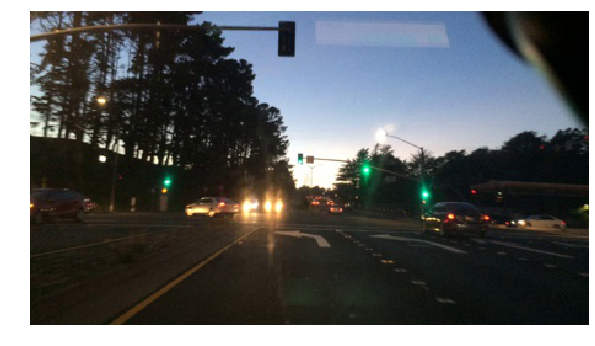

In [29]:
import os, random

images_path = './Test_Images/Test4.jpg'
image = caffe.io.load_image(images_path)
cls = c.predict([image]).argmax()
plt.imshow(image)
plt.axis('off')
print 'predicted class is:', class_idx_to_name(cls)